<a href="https://colab.research.google.com/github/mumtazuddin/CapstoneProject_911/blob/main/EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import random 
import os
import missingno as msno
%matplotlib inline

## Reading the csv from the website url directly

In [ ]:
df = pd.read_csv ( "https://opendata.arcgis.com/datasets/798b84abd9aa4116896434a3ac85457c_0.csv", index_col= 0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
df.head()

,recordId,callKey,callDateTime,priority,district,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,ZIPCode
OBJECTID,,,,,,,,,,,,,,,,,,
1,8285810,10CC9DA95F732422,2020/09/29 08:10:00,Low,ND,HIT AND RUN,P202730971,1200 W NORTHERN PY,1200 W NORTHERN PY BALTIMORE MD,Sabina-Mattfeldt,Northern,533.0,5.0,D2,Mount Washington/Coldspring,Census Tract 2715.01,NaN,21209.0
2,8286114,10CC9DA95F7333B2,2020/09/29 09:16:00,Low,SD,LARCENY,P202731136,900 WASHINGTON BL,900 WASHINGTON BL BALTIMORE MD,Washington Village/Pigtown,Southern,932.0,10.0,D7,Washington Village/Pigtown,Census Tract 2101,NaN,21230.0
3,8286082,10CC9DA95F733855,2020/09/29 09:36:00,Low,NE,AUTO THEFT,P202731188,4200 BLK FENWICK AV,4200 BLK FENWICK AV BALTIMORE MD,Hillen,Northeastern,412.0,3.0,D4,Northwood,Census Tract 2709.03,NaN,21218.0
4,8290068,10CC9DA95F748561,2020/09/30 09:17:00,Low,SE,OTHER,P202741169,1100 S CONKLING ST,1100 S CONKLING ST BALTIMORE MD,Canton,Southeastern,232.0,1.0,D6,Highlandtown,Census Tract 2609,NaN,21224.0
5,8290067,10CC9DA95F748784,2020/09/30 09:26:00,Low,WD,OTHER,P202741196,2400 WINCHESTER ST,2400 WINCHESTER ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,NaN,21216.0


### Initial Hypothesis Questions- 

When to expect more 911 calls and where do these calls come from?

When does the need for police officers/first responders increase/decrease? 

Can we schedule their shifts in a more efficient manner?

In [ ]:
import nltk
from nltk.corpus import words
from nltk.metrics.distance import (
    edit_distance,
    jaccard_distance,
    )
from nltk.util import ngrams
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
correct_spellings = words.words()
spellings_series = pd.Series(correct_spellings)
spellings_series

0                 A
1                 a
2                aa
3               aal
4             aalii
            ...    
236731       yellow
236732          yes
236733    yesterday
236734          you
236735        young
Length: 236736, dtype: object

In [ ]:
# def jaccard(entries, gram_number):
    
#    outcomes = []
#    for entry in entries: #iteratively for loop
#        spellings = spellings_series[spellings_series.str.startswith(entry[0])] 
#        distances = ((jaccard_distance(set(ngrams(entry, gram_number)),
#                                       set(ngrams(word, gram_number))), word)
#                     for word in spellings)
#        closest = min(distances)
#        outcomes.append(closest[1])
#    return outcomes 

In [ ]:
# def JDreco(entries=['cormulent', 'incendenece', 'validrate']):
#    """finds the closest word based on jaccard distance"""
#    return jaccard(entries, 3) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465130 entries, 1 to 1465130
Data columns (total 18 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   recordId                     1465130 non-null  int64  
 1   callKey                      1465130 non-null  object 
 2   callDateTime                 1465130 non-null  object 
 3   priority                     1465128 non-null  object 
 4   district                     1465130 non-null  object 
 5   description                  1465130 non-null  object 
 6   callNumber                   1465130 non-null  object 
 7   incidentLocation             1465129 non-null  object 
 8   location                     1465130 non-null  object 
 9   Neighborhood                 1442252 non-null  object 
 10  PoliceDistrict               1442327 non-null  object 
 11  PolicePost                   1442327 non-null  float64
 12  CouncilDistrict              1442368 non-n

In [ ]:
df.isnull().sum()

recordId                             0
callKey                              0
callDateTime                         0
priority                             2
district                             0
description                          0
callNumber                           0
incidentLocation                     1
location                             0
Neighborhood                     22878
PoliceDistrict                   22803
PolicePost                       22803
CouncilDistrict                  22762
SheriffDistricts                 22801
Community_Statistical_Areas      23308
Census_Tracts                    22813
VRIZones                       1233043
ZIPCode                          23834
dtype: int64

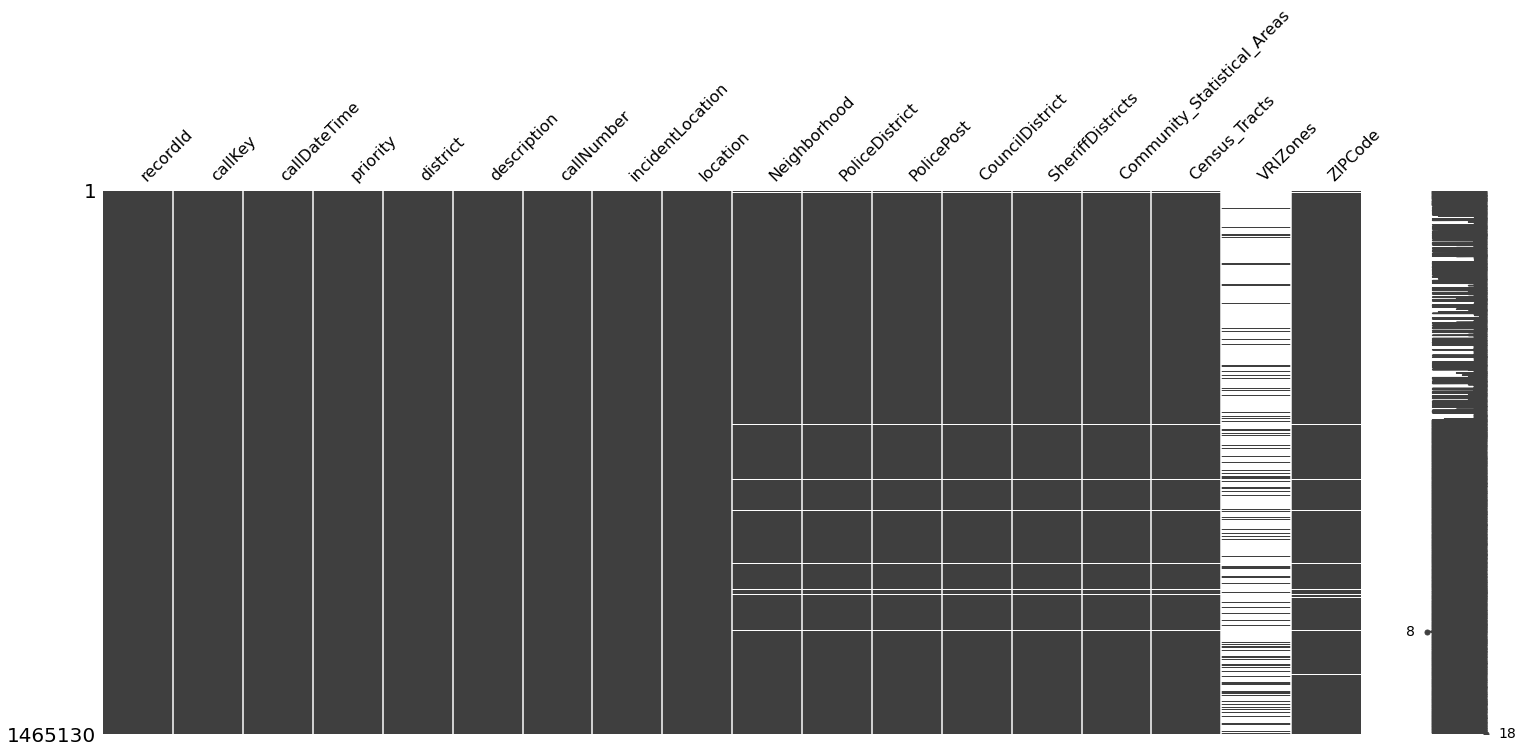

In [ ]:
msno.matrix(df)

In [ ]:
df= df.drop('VRIZones', 1)
df

,recordId,callKey,callDateTime,priority,district,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,ZIPCode
OBJECTID,,,,,,,,,,,,,,,,,
1,8285810,10CC9DA95F732422,2020/09/29 08:10:00,Low,ND,HIT AND RUN,P202730971,1200 W NORTHERN PY,1200 W NORTHERN PY BALTIMORE MD,Sabina-Mattfeldt,Northern,533.0,5.0,D2,Mount Washington/Coldspring,Census Tract 2715.01,21209.0
2,8286114,10CC9DA95F7333B2,2020/09/29 09:16:00,Low,SD,LARCENY,P202731136,900 WASHINGTON BL,900 WASHINGTON BL BALTIMORE MD,Washington Village/Pigtown,Southern,932.0,10.0,D7,Washington Village/Pigtown,Census Tract 2101,21230.0
3,8286082,10CC9DA95F733855,2020/09/29 09:36:00,Low,NE,AUTO THEFT,P202731188,4200 BLK FENWICK AV,4200 BLK FENWICK AV BALTIMORE MD,Hillen,Northeastern,412.0,3.0,D4,Northwood,Census Tract 2709.03,21218.0
4,8290068,10CC9DA95F748561,2020/09/30 09:17:00,Low,SE,OTHER,P202741169,1100 S CONKLING ST,1100 S CONKLING ST BALTIMORE MD,Canton,Southeastern,232.0,1.0,D6,Highlandtown,Census Tract 2609,21224.0
5,8290067,10CC9DA95F748784,2020/09/30 09:26:00,Low,WD,OTHER,P202741196,2400 WINCHESTER ST,2400 WINCHESTER ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,21216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465126,8699998,FCC9DA95FEDF022,2020/12/31 10:37:00,Medium,NE,BURGLARY,P203662055,1700 LAKESIDE AV,1700 LAKESIDE AV BALTIMORE MD,Ednor Gardens-Lakeside,Northeastern,412.0,14.0,D4,Northwood,Census Tract 902,21218.0
1465127,8700237,FCC9DA95FEE0A32,2020/12/31 12:27:59,Medium,SD,NARCOTICS,P203662471,200 WARREN AV,200 WARREN AV BALTIMORE MD,Federal Hill,Southern,942.0,11.0,D7,Inner Harbor/Federal Hill,Census Tract 2403,21230.0
1465128,8700611,FCC9DA95FEE1C12,2020/12/31 13:44:00,Low,SW,HIT AND RUN,P203662755,800 COOKS LN,800 COOKS LN BALTIMORE MD,West Hills,Southwestern,823.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2804.01,21229.0


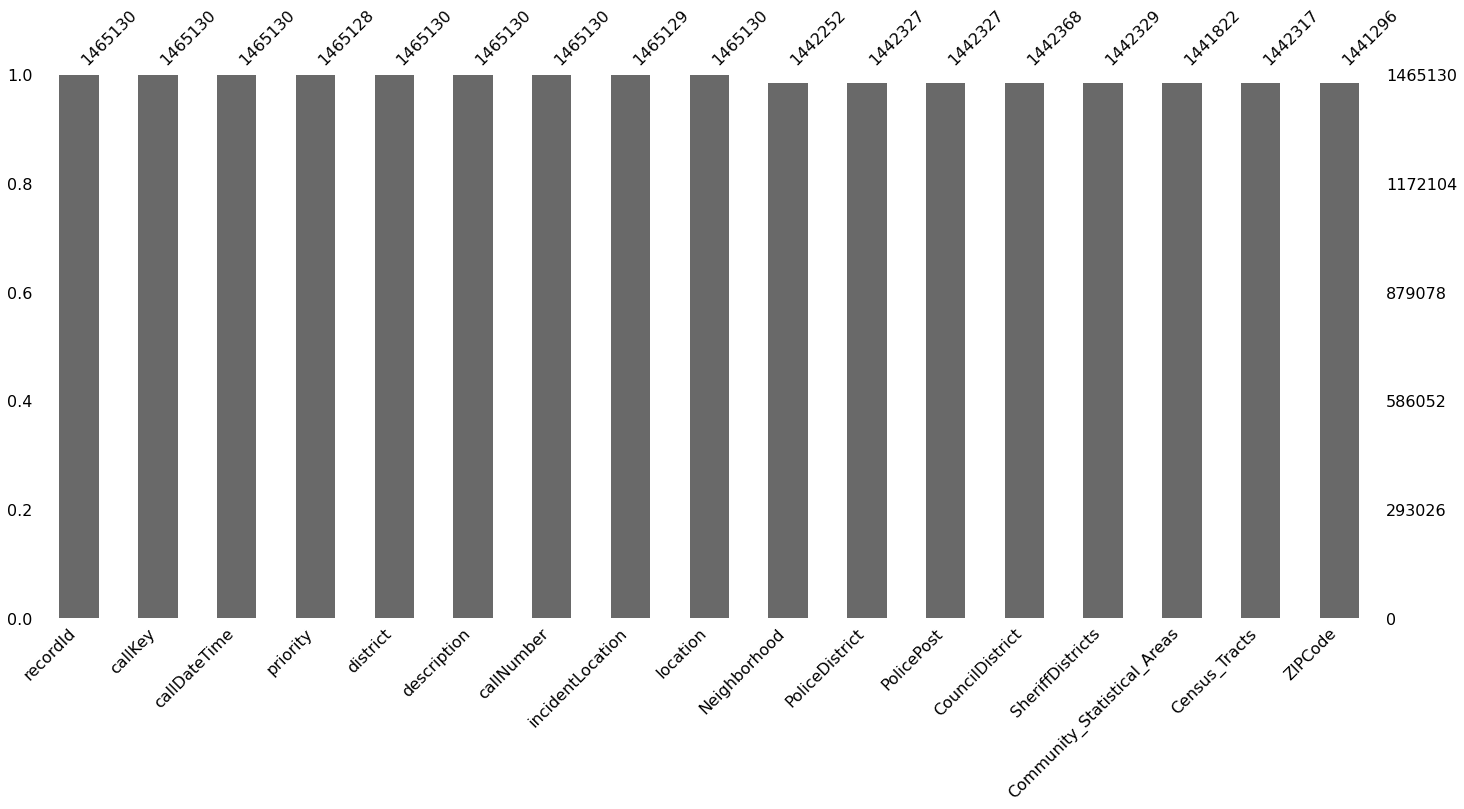

In [ ]:
msno.bar(df)

District column and police district columns are identical just they have used initals instead of full names (ex- North eastern = NE , SD = southern) 

So Removing the initials column

In [ ]:
df= df.drop('district', 1)
df

,recordId,callKey,callDateTime,priority,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,ZIPCode
OBJECTID,,,,,,,,,,,,,,,,
1,8285810,10CC9DA95F732422,2020/09/29 08:10:00,Low,HIT AND RUN,P202730971,1200 W NORTHERN PY,1200 W NORTHERN PY BALTIMORE MD,Sabina-Mattfeldt,Northern,533.0,5.0,D2,Mount Washington/Coldspring,Census Tract 2715.01,21209.0
2,8286114,10CC9DA95F7333B2,2020/09/29 09:16:00,Low,LARCENY,P202731136,900 WASHINGTON BL,900 WASHINGTON BL BALTIMORE MD,Washington Village/Pigtown,Southern,932.0,10.0,D7,Washington Village/Pigtown,Census Tract 2101,21230.0
3,8286082,10CC9DA95F733855,2020/09/29 09:36:00,Low,AUTO THEFT,P202731188,4200 BLK FENWICK AV,4200 BLK FENWICK AV BALTIMORE MD,Hillen,Northeastern,412.0,3.0,D4,Northwood,Census Tract 2709.03,21218.0
4,8290068,10CC9DA95F748561,2020/09/30 09:17:00,Low,OTHER,P202741169,1100 S CONKLING ST,1100 S CONKLING ST BALTIMORE MD,Canton,Southeastern,232.0,1.0,D6,Highlandtown,Census Tract 2609,21224.0
5,8290067,10CC9DA95F748784,2020/09/30 09:26:00,Low,OTHER,P202741196,2400 WINCHESTER ST,2400 WINCHESTER ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,21216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465126,8699998,FCC9DA95FEDF022,2020/12/31 10:37:00,Medium,BURGLARY,P203662055,1700 LAKESIDE AV,1700 LAKESIDE AV BALTIMORE MD,Ednor Gardens-Lakeside,Northeastern,412.0,14.0,D4,Northwood,Census Tract 902,21218.0
1465127,8700237,FCC9DA95FEE0A32,2020/12/31 12:27:59,Medium,NARCOTICS,P203662471,200 WARREN AV,200 WARREN AV BALTIMORE MD,Federal Hill,Southern,942.0,11.0,D7,Inner Harbor/Federal Hill,Census Tract 2403,21230.0
1465128,8700611,FCC9DA95FEE1C12,2020/12/31 13:44:00,Low,HIT AND RUN,P203662755,800 COOKS LN,800 COOKS LN BALTIMORE MD,West Hills,Southwestern,823.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2804.01,21229.0


In [ ]:
df= df.drop('Census_Tracts',1)

Checking if incident location are same as the location reported, turned out to be similar so will drop the column incident location.
And dropping all the unneccesary columns in the dataset.

In [ ]:
df= df.drop('incidentLocation',1)

Checking for additional null values in the dataframe.

In [ ]:
df.isnull().sum()

recordId                           0
callKey                            0
callDateTime                       0
priority                           2
description                        0
callNumber                         0
location                           0
Neighborhood                   22878
PoliceDistrict                 22803
PolicePost                     22803
CouncilDistrict                22762
SheriffDistricts               22801
Community_Statistical_Areas    23308
ZIPCode                        23834
dtype: int64

In [ ]:
df = df[df['priority'].notna()]
df = df[df['Neighborhood'].notna()]
df = df[df['PoliceDistrict'].notna()]
df = df[df['PolicePost'].notna()]
df = df[df['CouncilDistrict'].notna()]
df = df[df['SheriffDistricts'].notna()]
df = df[df['Community_Statistical_Areas'].notna()]
df = df[df['ZIPCode'].notna()]

In [ ]:
df.isnull().sum()

recordId                       0
callKey                        0
callDateTime                   0
priority                       0
description                    0
callNumber                     0
location                       0
Neighborhood                   0
PoliceDistrict                 0
PolicePost                     0
CouncilDistrict                0
SheriffDistricts               0
Community_Statistical_Areas    0
ZIPCode                        0
dtype: int64

dropping all null values in the dataset and making it clean for exploratory analsis.

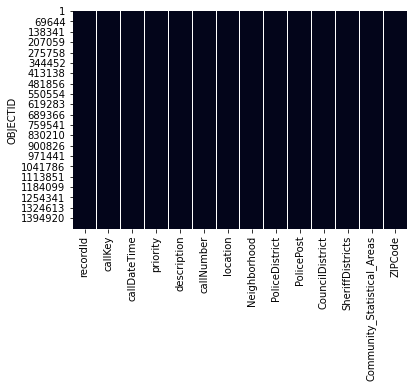

In [ ]:
sns.heatmap(df.isnull(), cbar = False)

In [ ]:
group_data= df.groupby(['description']).sum()

In [ ]:
group_data.head(5)

,recordId,PolicePost,CouncilDistrict,ZIPCode
description,,,,
* ANIMAL CONTROL,8174174,831.0,10.0,21230.0
-OVERCROWDING,7624668,232.0,1.0,21224.0
.,47864795,2553.0,54.0,127294.0
.INVESTIGATE,8402180,111.0,11.0,21202.0
0PENLINE,8431932,623.0,5.0,21215.0


In [ ]:
df['description'] = df['description'].str.upper()

In [ ]:
l1= list(df['description'].unique())

In [ ]:
l1.sort(key=len)

In [ ]:
#l1

In [ ]:
#punc = """`!()-[]{};:'"\,<>./?@#$%^&*_~"""
  
#for i in range(len(l1)):  
#    for x in punc:  
#        l1[i] = l1[i].replace(x, "")
#    if len(l1[i])>4:
#      try:
#        print(jaccard(l1[i],3))
#      except:
#        pass
   

In [ ]:
#l1

## EXPLORATORY DATA ANALYSIS-

Checking the values for the priority of calls labelled as following-

In [ ]:
#df[df['priority'].str.contains('low')]
df.priority.value_counts()

Non-Emergency     888591
Medium            246404
Low               232748
High               72637
Emergency            221
Out of Service       112
Name: priority, dtype: int64

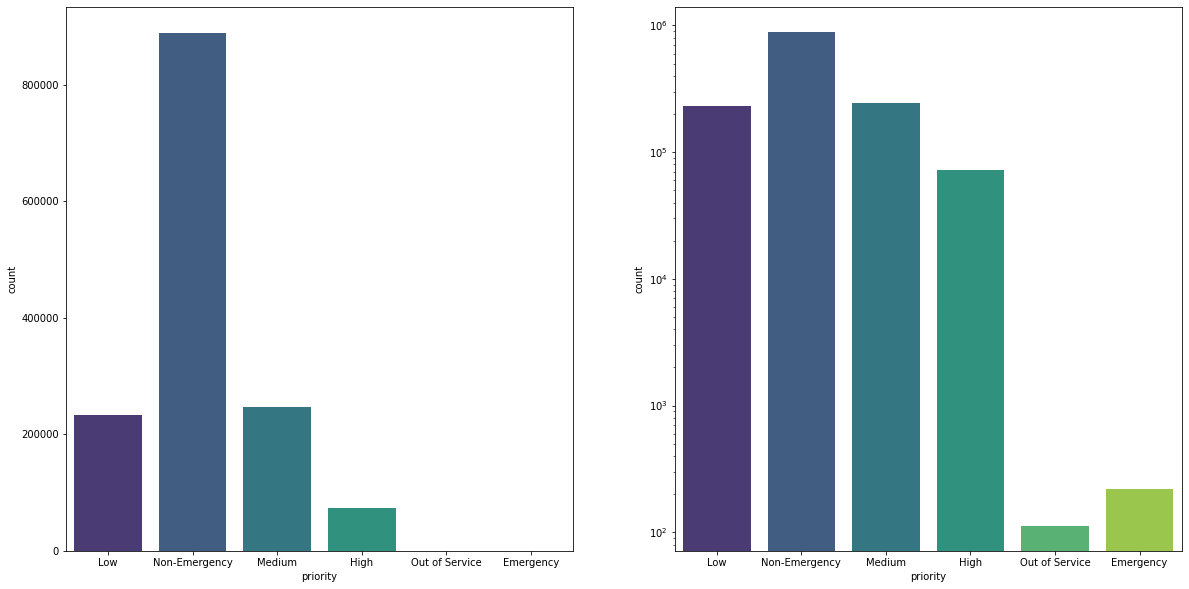

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='priority',data=df,palette='viridis',ax=ax[0])
sns.countplot(x='priority',data=df,palette='viridis', log=True,ax=ax[1])

#increasing the degree to show values of emergency and out of service calls as they are very low compared to others 

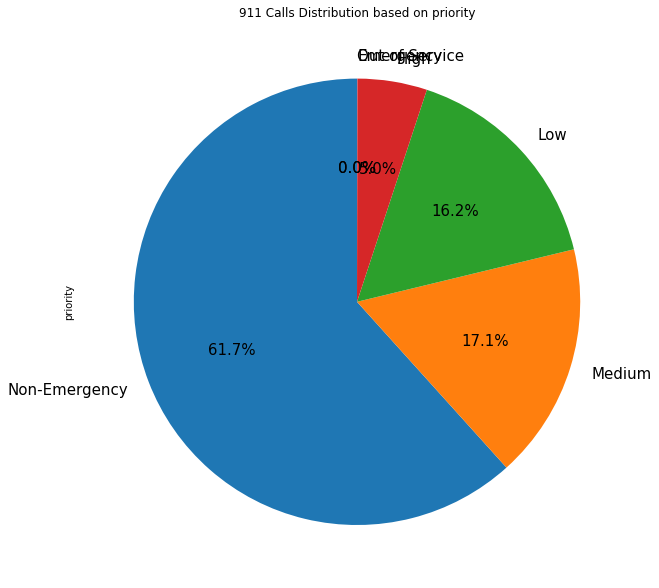

In [ ]:
df['priority'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90, shadow=False, title='911 Calls Distribution based on priority',
                                   fontsize=15, figsize=(10,20))

In [ ]:
df['callDateTime']
#changing to datetime for visualisation of time series

OBJECTID
1          2020/09/29 08:10:00
2          2020/09/29 09:16:00
3          2020/09/29 09:36:00
4          2020/09/30 09:17:00
5          2020/09/30 09:26:00
                  ...         
1465126    2020/12/31 10:37:00
1465127    2020/12/31 12:27:59
1465128    2020/12/31 13:44:00
1465129    2020/12/31 14:39:59
1465130    2020/08/07 10:50:59
Name: callDateTime, Length: 1440713, dtype: object

In [ ]:
df['callDateTime'] =  pd.to_datetime(df['callDateTime'])
df['callDateTime']

OBJECTID
1         2020-09-29 08:10:00
2         2020-09-29 09:16:00
3         2020-09-29 09:36:00
4         2020-09-30 09:17:00
5         2020-09-30 09:26:00
                  ...        
1465126   2020-12-31 10:37:00
1465127   2020-12-31 12:27:59
1465128   2020-12-31 13:44:00
1465129   2020-12-31 14:39:59
1465130   2020-08-07 10:50:59
Name: callDateTime, Length: 1440713, dtype: datetime64[ns]

Text(0.5, 0, 'Month')

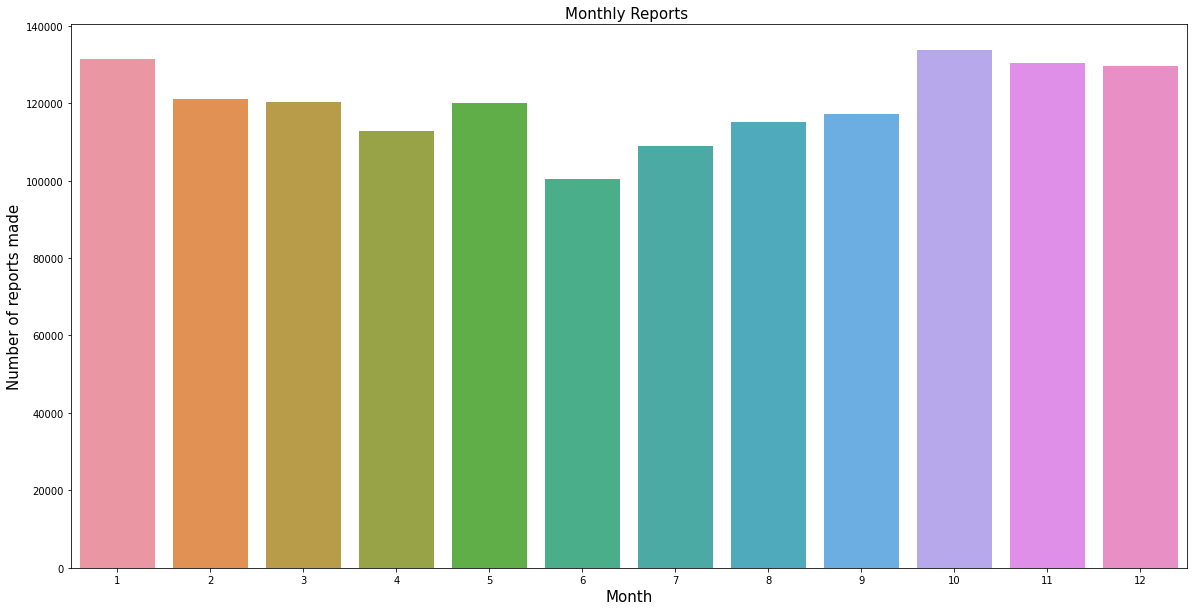

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['callDateTime'].dt.month)
plt.title('Monthly Reports ', fontsize=15) 
plt.ylabel('Number of reports made', fontsize=15) 
plt.xlabel('Month', fontsize=15)

Text(0.5, 0, 'Datewise')

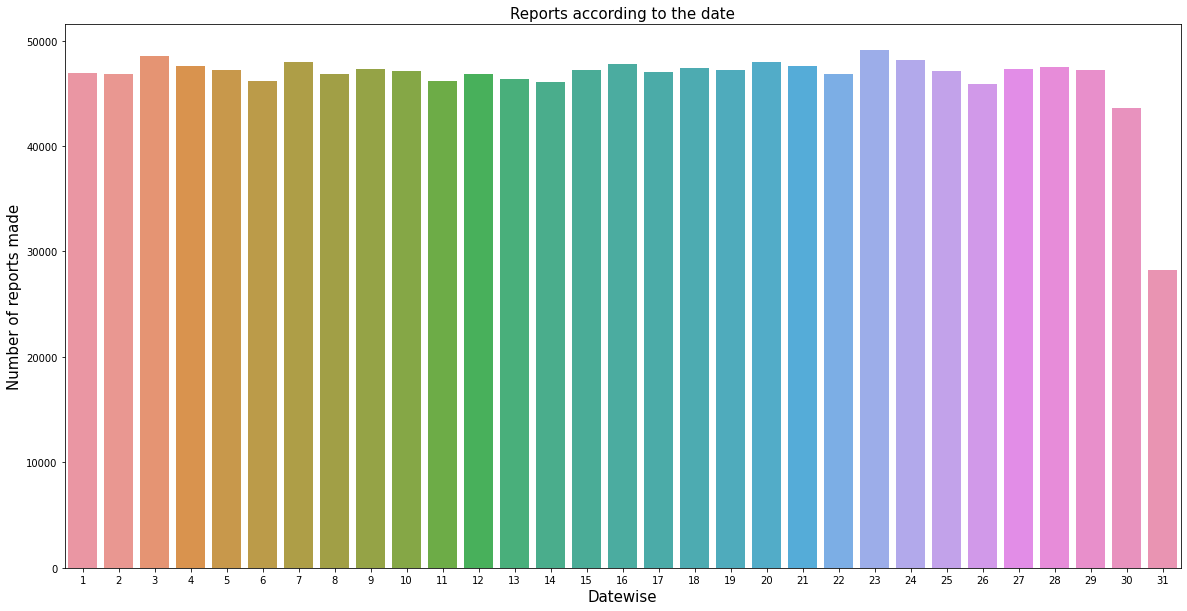

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['callDateTime'].dt.day)
plt.title('Reports according to the date', fontsize=15) 
plt.ylabel('Number of reports made', fontsize=15) 
plt.xlabel('Datewise', fontsize=15)

Text(0.5, 0, 'Hour')

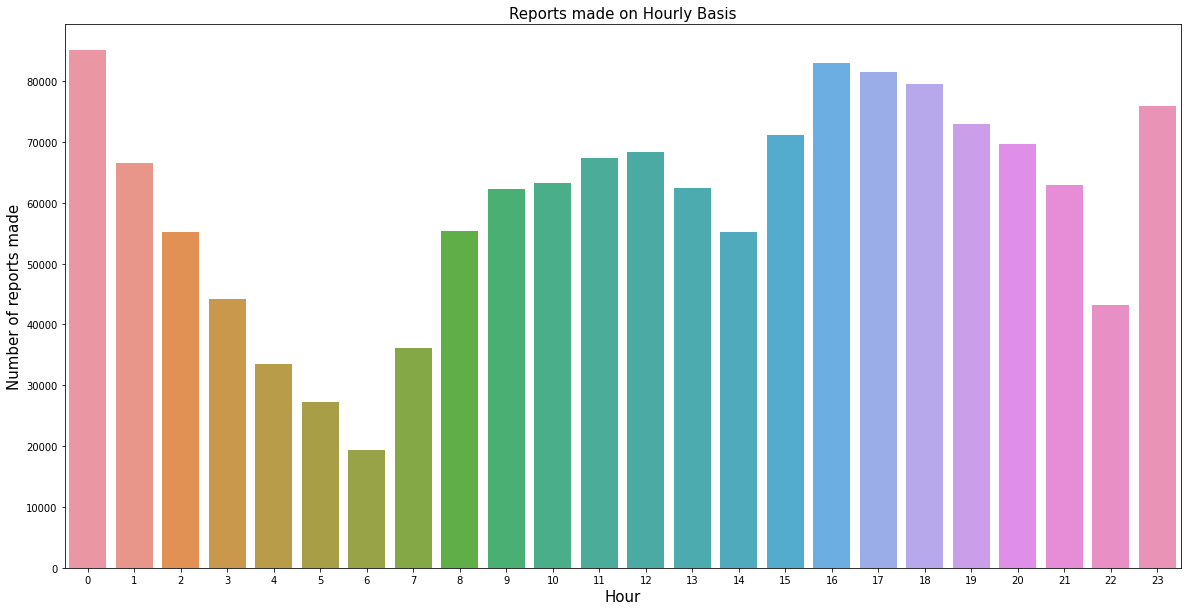

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['callDateTime'].dt.hour)
plt.title('Reports made on Hourly Basis', fontsize=15) 
plt.ylabel('Number of reports made', fontsize=15) 
plt.xlabel('Hour', fontsize=15)

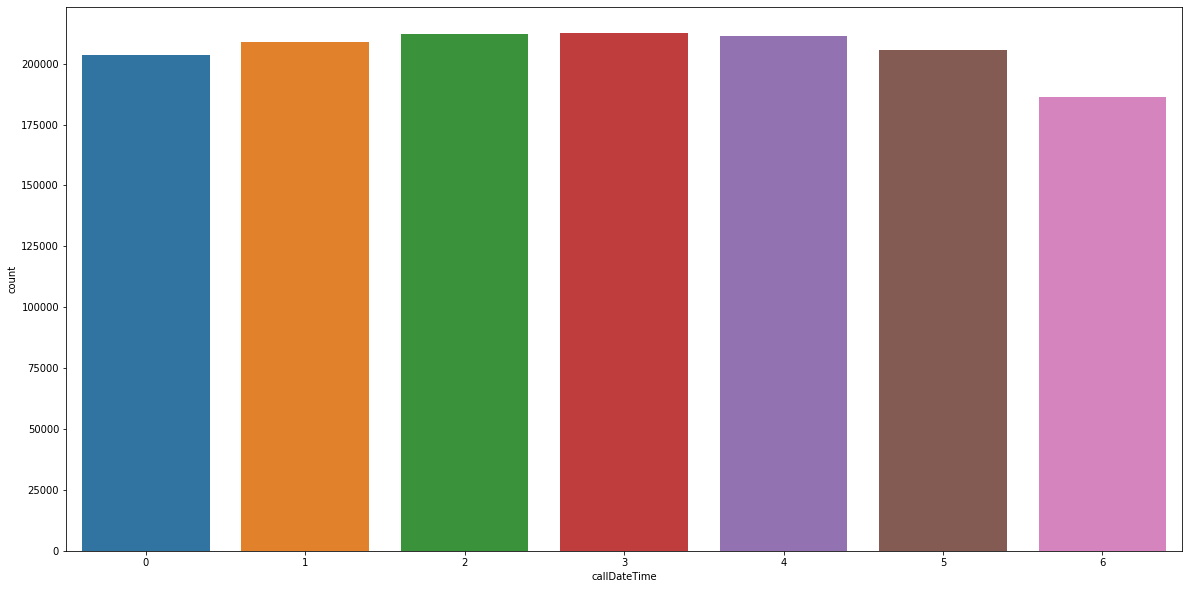

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['callDateTime'].dt.dayofweek)

Text(0.5, 0, 'Day of the week')

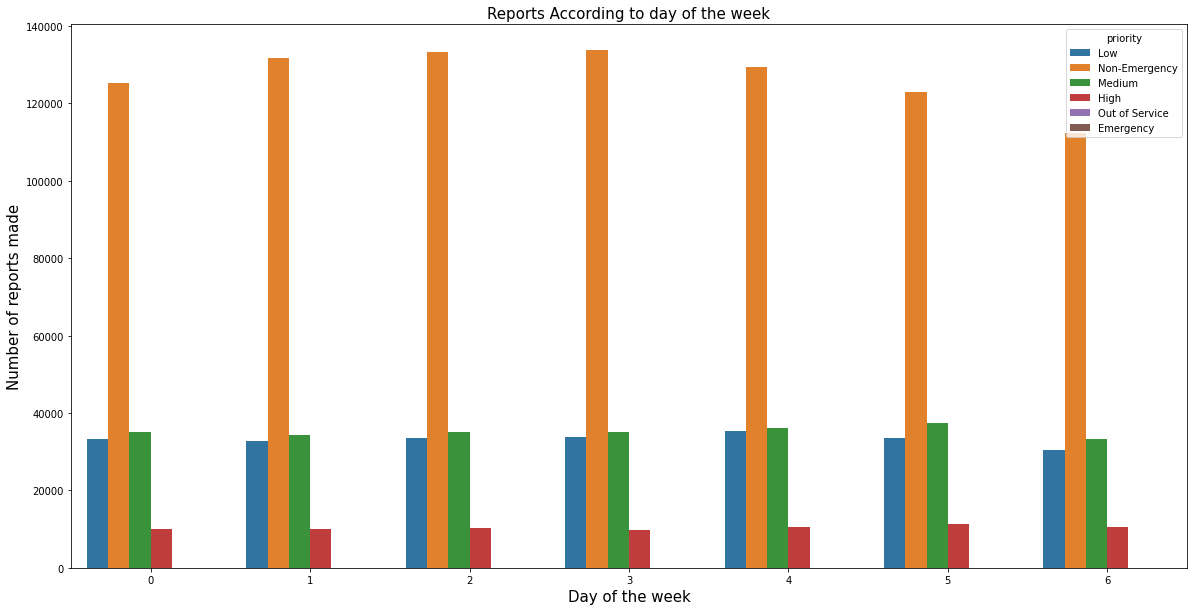

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['callDateTime'].dt.dayofweek, hue = df['priority'] )
plt.title('Reports According to day of the week', fontsize=15) 
plt.ylabel('Number of reports made', fontsize=15) 
plt.xlabel('Day of the week', fontsize=15)

Creating a new dataframe to find out the top 10 types of description of incidents reported in the whole dataframe. 

In [ ]:
df['description'].value_counts()

BUSINESS CHECK      502156
FOOT  PATROL         90096
DISORDERLY           88213
911/NO  VOICE        75064
TRAFFIC STOP         70506
                     ...  
GATHER                   1
LOST PROERTY             1
LOUD NOICE               1
CHECK-WELL BEING         1
FOLLOW UP 80             1
Name: description, Length: 2563, dtype: int64

In [ ]:
s= df.description.value_counts().nlargest(10)
df2 = df.loc[df['description'].isin(s.index)]
df2

,recordId,callKey,callDateTime,priority,description,callNumber,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,ZIPCode
OBJECTID,,,,,,,,,,,,,,
27,8328171,10CC9DA95F805980,2020-10-09 08:36:59,Medium,NARCOTICS,P202831469,ROBERT ST and MCCULLOH ST BALTIMORE MD,Madison Park,Central,132.0,11.0,D8,Upton/Druid Heights,21217.0
37,8349063,10CC9DA95F871BBD,2020-10-14 11:39:00,Medium,NARCOTICS,P202881630,2100 N CHARLES ST BALTIMORE MD,Charles North,Northern,514.0,12.0,D2,Greater Charles Village/Barclay,21218.0
38,8349332,10CC9DA95F8735FB,2020-10-14 13:31:00,Medium,NARCOTICS,P202882000,200 N PACA ST BALTIMORE MD,Downtown,Central,111.0,11.0,D7,Downtown/Seton Hill,21201.0
48,8372513,10CC9DA95F8DCA8D,2020-10-19 13:18:59,Medium,NARCOTICS,P202932466,CORDELIA AV and W BELVEDERE AV BALTIMORE MD,Arlington,Northwestern,633.0,5.0,D1,Pimlico/Arlington/Hilltop,21215.0
62,8385882,10CC9DA95F91B01D,2020-10-22 12:14:59,Medium,NARCOTICS,P202962161,600 N CURLEY ST BALTIMORE MD,Ellwood Park/Monument,Southeastern,224.0,13.0,D5,Madison/East End,21205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465099,8665638,FCC9DA95FE24CBC,2020-12-22 14:44:00,Medium,COMMON ASSAULT,P203572600,2600 HAMPDEN AV BALTIMORE MD,Remington,Northern,511.0,12.0,D2,Medfield/Hampden/Woodberry/Remington,21211.0
1465106,8673141,FCC9DA95FE4997F,2020-12-24 08:35:59,Medium,COMMON ASSAULT,P203591177,1800 BLK S MONROE ST BALTIMORE MD,Carroll - Camden Industrial Area,Southern,941.0,10.0,D7,Westport/Mount Winans/Lakeland,21230.0
1465120,8691206,FCC9DA95FEB6447,2020-12-29 12:14:59,Medium,NARCOTICS,P203642086,1300 MCHENRY ST BALTIMORE MD,New Southwest/Mount Clare,Southern,935.0,9.0,D8,Southwest Baltimore,21223.0


Text(0.5, 0, 'Top 10 Descriptions')

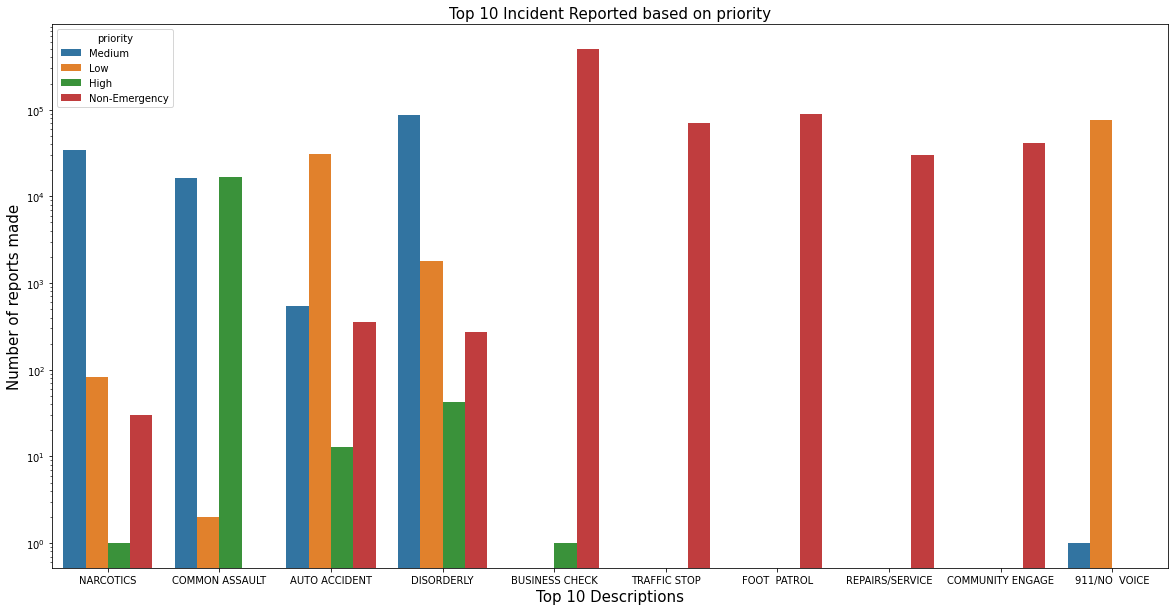

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df2['description'], hue = df2['priority'], log=True )
plt.title('Top 10 Incident Reported based on priority', fontsize=15) 
plt.ylabel('Number of reports made', fontsize=15) 
plt.xlabel('Top 10 Descriptions', fontsize=15)

In [ ]:
df2['callDateTime'].dt.date.value_counts()

2020-11-23    3687
2020-10-15    3570
2020-10-16    3531
2020-01-31    3492
2020-08-27    3487
              ... 
2020-07-15    1744
2020-06-07    1736
2020-08-16    1709
2020-06-08    1688
2020-07-14    1256
Name: callDateTime, Length: 366, dtype: int64

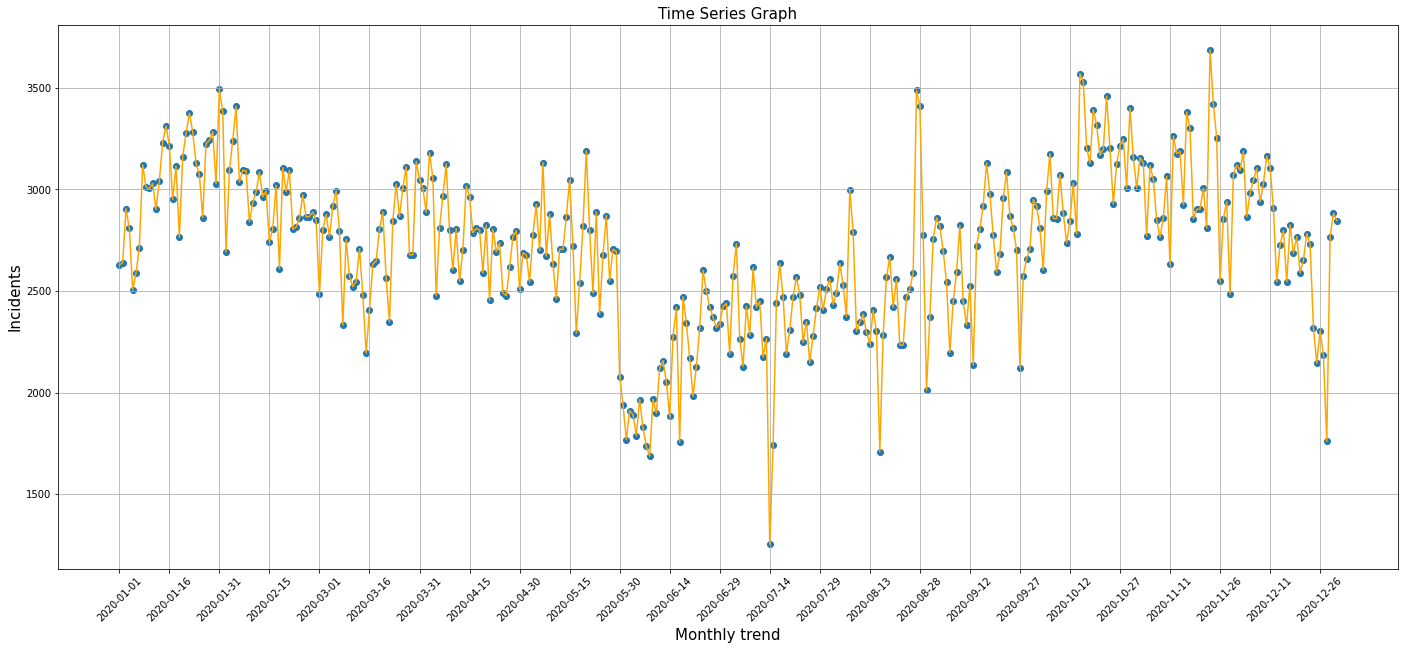

In [ ]:
fig, ax = plt.subplots(figsize=(24,10))
ax.scatter(y = df2['callDateTime'].dt.date.value_counts(),x= df2['callDateTime'].dt.date.value_counts().index)
df2['callDateTime'].dt.date.value_counts().plot(ax=ax,color='Orange')
ax.set_xticks(np.arange(df2['callDateTime'].dt.date.value_counts().index.min(),df2['callDateTime'].dt.date.value_counts().index.max(),15))
plt.title('Time Series Graph', fontsize=15) 
plt.ylabel('Incidents', fontsize=15) 
plt.xlabel('Monthly trend in 2020', fontsize=15)
plt.xticks(rotation=45)                                                               
plt.grid()
plt.show()

https://towardsdatascience.com/create-autocorrect-in-python-d1d87679b1

In [ ]:
from google.colab import files 

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/capstoneproject"

mdpv_imap_baci.cpg  mdpv_imap_baci.shp.xml  ppoly_imap_baci.sbx
mdpv_imap_baci.dbf  mdpv_imap_baci.shx	    ppoly_imap_baci.shp
mdpv_imap_baci.prj  ppoly_imap_baci.cpg     ppoly_imap_baci.shp.xml
mdpv_imap_baci.sbn  ppoly_imap_baci.dbf     ppoly_imap_baci.shx
mdpv_imap_baci.sbx  ppoly_imap_baci.prj
mdpv_imap_baci.shp  ppoly_imap_baci.sbn


In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/capstoneproject/ppoly_imap_baci.shp')
gdf

,JURSCODE,ACCTID,CT2010,BG2010,GEOGCODE,OOI,RESITYP,ADDRESS,STRTNUM,STRTDIR,STRTNAM,STRTTYP,STRTSFX,STRTUNT,ADDRTYP,CITY,ZIPCODE,OWNNAME1,OWNNAME2,NAMEKEY,OWNADD1,OWNADD2,OWNCITY,OWNSTATE,OWNERZIP,OWNZIP2,PREMSNUM,PREMSDIR,PREMSNAM,PREMSTYP,PREMCITY,PREMZIP,PREMZIP2,LEGAL1,LEGAL2,LEGAL3,DR1CLERK,DR1LIBER,DR1FOLIO,TOWNCODE,...,GR1FOLO1,CONVEY1,TRADATE,CONSIDR1,MORTGAG1,NFMLNDVL,NFMIMPVL,NFMTTLVL,CRTARCOD,FCMACODE,AGFNDAREA,AGFNDLUOM,ENTZNDAT,ENTZNASSM,PLNDEVDAT,NPRCTSTDAT,NPRCAREA,NPRCLUOM,HOMQLCOD,HOMQLDAT,BLDG_STORY,BLDG_UNITS,RESIDENT,RESI2010,RESI2000,RESI1990,RESIUTHS,APRTMENT,TRAILER,SPECIAL,OTHER,PTYPE,SDATWEBADR,EXISTING,MDPVDATE,SDATDATE,POLYDATE,POLYACRES,POLYID,geometry
0,BACI,0301011738 001,24510010500,245100105001,82,H,SF,2101 E BALTIMORE ST,2101,E,BALTIMORE,ST,None,None,P,BALTIMORE,21231,KISELIK DANIEL R,KISELIK ALICE,KISELIK DANIEL R,2101 E BALTIMORE ST,None,BALTIMORE,MD,21231,2000,2101,E,BALTIMORE,ST,BALTIMORE,21231,2000,IMPS18X100,None,None,LGA,18297,None,None,...,0106,1,20160719,805000,0,100000,651900,751900,None,None,0.0,None,None,0,None,None,0.0,None,A,None,None,0,1,0,0,0,0,0,0,0,1,2,https://sdat.dat.maryland.gov/RealProperty/Pag...,MDPV2017_18,2018FEB,2021FEB,2020OCT,0.038,03-0000000234819,"POLYGON ((435609.850 180438.731, 435604.772 18..."
1,BACI,0301011738 002,24510010500,245100105001,82,H,SF,2103 E BALTIMORE ST,2103,E,BALTIMORE,ST,None,None,P,BALTIMORE,21231,GUITIAN JR CELSO,GUITIAN LAURA,GUITIAN JR CELSO,2103 E BALTIMORE ST,None,BALTIMORE,MD,21231,2039,2103,E,BALTIMORE,ST,BALTIMORE,21231,2039,IMPS17-6X100,None,None,MB,19089,None,None,...,0213,1,20170426,570000,0,100000,453600,553600,None,None,0.0,None,None,0,None,None,0.0,None,A,None,None,0,1,0,0,0,0,0,0,0,1,2,https://sdat.dat.maryland.gov/RealProperty/Pag...,MDPV2017_18,2018FEB,2021FEB,2020OCT,0.040,03-0000000234820,"POLYGON ((435615.166 180439.021, 435609.850 18..."
2,BACI,0301011738 003,24510010500,245100105001,82,H,SF,2105 E BALTIMORE ST,2105,E,BALTIMORE,ST,None,None,P,BALTIMORE,21231,BOITNOTT CAROLYN P.,None,BOITNOTT CAROLYN P.,2105 E BALTIMORE ST,None,BALTIMORE,MD,21231,2039,2105,E,BALTIMORE,ST,BALTIMORE,21231,2039,IMPS17-6X100,None,None,FMC,01861,0203,None,...,None,4,20011030,0,0,100000,378300,478300,None,None,0.0,None,None,0,None,None,0.0,None,A,None,None,0,1,0,0,0,0,0,0,0,1,2,https://sdat.dat.maryland.gov/RealProperty/Pag...,MDPV2017_18,2018FEB,2021FEB,2020OCT,0.040,03-0000000234821,"POLYGON ((435620.512 180439.311, 435615.166 18..."
3,BACI,0301011738 004,24510010500,245100105001,82,H,SF,2107 E BALTIMORE ST,2107,E,BALTIMORE,ST,None,None,P,BALTIMORE,21231,NEWMAN NANCY E,None,NEWMAN NANCY E,2107 E BALTIMORE ST,None,BALTIMORE,MD,21231,2039,2107,E,BALTIMORE,ST,BALTIMORE,21231,2039,IMPS17-6X100,None,None,SEB,04997,0212,None,...,None,1,19950725,133250,0,100000,458100,558100,None,None,0.0,None,None,0,None,None,0.0,None,A,None,None,0,1,0,0,0,0,0,0,0,1,2,https://sdat.dat.maryland.gov/RealProperty/Pag...,MDPV2017_18,2018FEB,2021FEB,2020OCT,0.038,03-0000000234822,"POLYGON ((435625.599 180439.585, 435620.512 18..."
4,BACI,0301011738 005,24510010500,245100105001,82,H,SF,2109 E BALTIMORE ST,2109,E,BALTIMORE,ST,None,None,P,BALTIMORE,21231,EDIN KATHRYN J,NELSON TIMOTHY J,EDIN KATHRYN J,2109 E BALTIMORE ST,None,BALTIMORE,MD,21231,2039,2109,E,BALTIMORE,ST,BALTIMORE,21231,2039,IMPS17-6X100,None,None,FMC,15560,None,None,...,0231,1,20130826,657500,0,100000,593000,693000,None,None,0.0,None,None,0,None,None,0.0,None,A,None,None,0,1,0,0,0,0,0,0,0,1,2,https://sdat.dat.maryland.gov/RealProperty/Pag...,MDPV2017_18,2018FEB,2021FEB,2020OCT,0.042,03-0000000234823,"POLYGON ((435631.158 180439.893, 435625.599 18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235761,BACI,035000PSC0 020,24510130806

In [ ]:
gdf['OWNERZIP'] = pd.to_numeric(gdf['OWNERZIP'])
gdf['OWNERZIP']

0         21231.0
1         21231.0
2         21231.0
3         21231.0
4         21231.0
           ...   
235761    21201.0
235762    24042.0
235763    21203.0
235764    24042.0
235765    21224.0
Name: OWNERZIP, Length: 235766, dtype: float64

In [ ]:
gdf['value'] =0
for z in df['ZIPCode'].value_counts().index:
 gdf.loc[gdf['OWNERZIP']==int(z),'value'] = df.loc[df['ZIPCode']==z].shape[0]

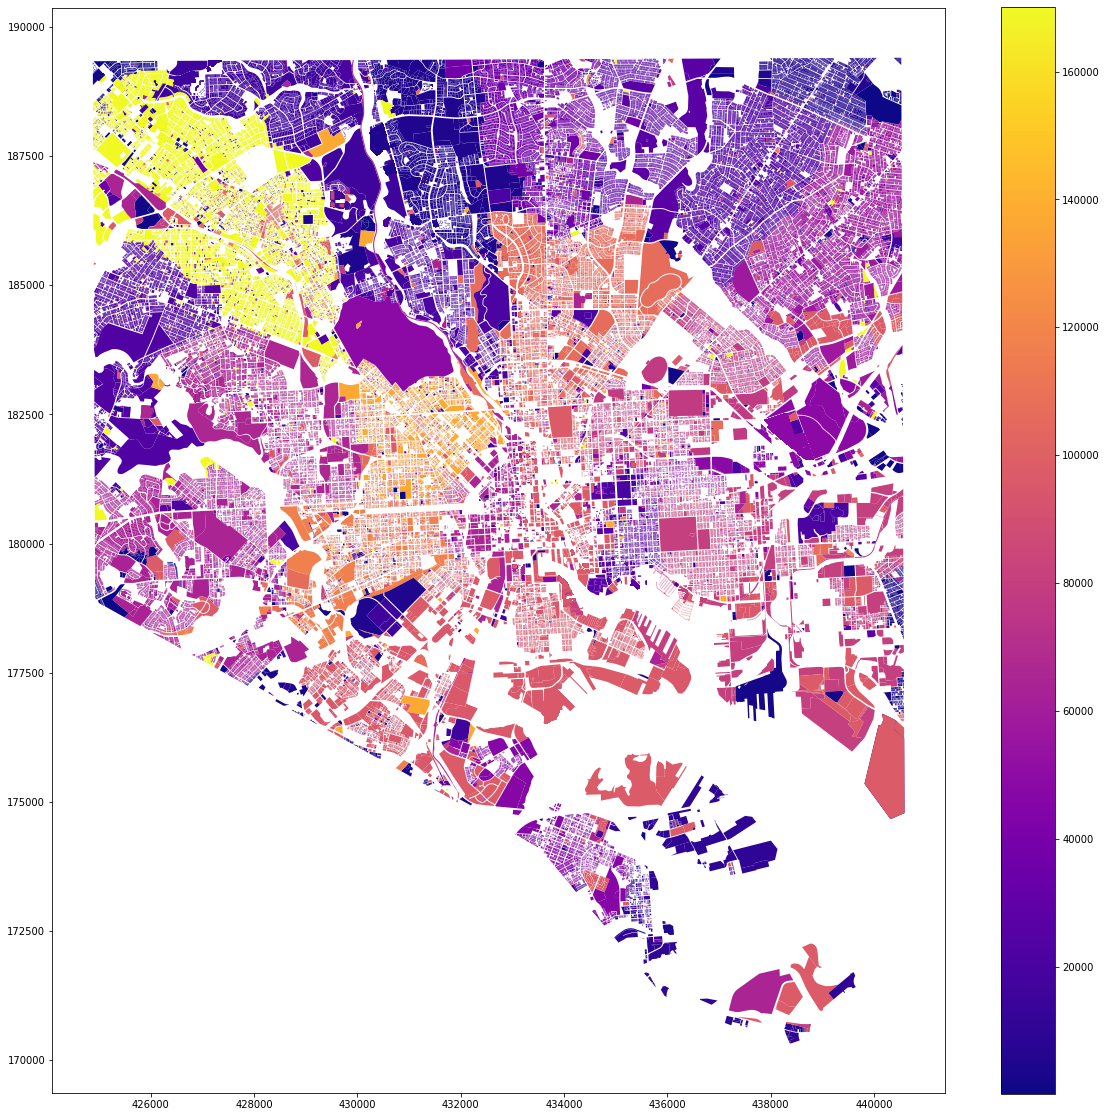

In [ ]:
fig,ax = plt.subplots(figsize=(20,20))
gdf.loc[gdf['value']>0].plot(column='value', legend = True, cmap = 'plasma',ax=ax)

In [ ]:
df.groupby(['ZIPCode','priority']).sum()

recordId  PolicePost  CouncilDistrict
ZIPCode priority                                                 
21201.0 Emergency          171444740      3413.0            243.0
        High             32448667975    751170.0          45048.0
        Low             114982182329   3062898.0         159423.0
        Medium          104729028561   2422999.0         145242.0
        Non-Emergency   262475979346   9729027.0         351885.0
...                              ...         ...              ...
21287.0 High              1692406280     68334.0           2713.0
        Low              10878541419    442443.0          17712.0
        Medium            3497168469    141546.0           5627.0
        Non-Emergency     7866388080    316556.0          12648.0
        Out of Service       8474858       321.0             13.0

[175 rows x 3 columns]